In [1]:
# Executing these “magic commands” will inform your notebook to actively
# reload all imported modules and packages as theyare modified.
%load_ext autoreload

In [2]:
%reload_ext autoreload

In [3]:
# import necessary modules
import glob
import importlib
import os
import re
import sys


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

import compare_IPA as ipa

In [4]:
# run this to reload module import
importlib.reload(ipa)

<module 'compare_IPA' from '/Users/davidjdebonis/repos/IPA_vowel_compare/compare_IPA.py'>

In [5]:
# import pronunciation ipa files
desc_transcript_files = glob.glob('transcriptions/descriptive/*.txt') # take in all desc filepaths
presc_transcript_file = glob.glob('transcriptions/prescriptive/*.txt') # take in presc transc file

In [6]:
# import survey csv
survey_data_raw = pd.read_csv("survey_data/survey_data.csv")

In [7]:
def file_finder(filepath):
    """
    Takes a filepath (str) and exracts: (1) its path, (2) its name, and (3) its extension.
    This metadata is filtered into a dictionary.
    For example, the filepath 'folder/directory/repository/file_name.txt' would return:
        File path: 'folder/directory/repository/'
        File name: 'file_name'
        File extention: '.txt'
    :param: filepath: string of a filepath (from current working directory)
    :returns: dictionary with orginal filepath as well as sorted metadata
    """
    prefix = ""
    file_name = ""
    file_ext = ""

    furthest_dir_index = 0
    extention_index = 0

    if "/" in filepath:
        index_ls = []
        for index,char in enumerate(filepath):
            if char == "/":
                index_ls.append(index)

        furthest_dir_index = max(index_ls)

        path = filepath[:(furthest_dir_index + 1)]



    if "." in filepath:
        for i,c in enumerate(filepath):
            if c == ".":
                extention_index = i
                file_ext = filepath[extention_index:]

        file_name = filepath[(furthest_dir_index + 1):(extention_index)]

    else:
        file_name = filepath[furthest_dir_index:]


    dictionary = {"full_path": filepath, "file_name": file_name,
                  "prefix": prefix, "extention" : file_ext}

    return(dictionary)

def open_and_read(infile_path_and_name):
    """
    opens a file and returns a long long long string
    Parameters
    ----------
    infile_path_and_name : str
        string of the path/path/txtFileName.txt from the current directory
        
    Returns
    -------
    string : str
        string of the data within the designated file
    """
    path = infile_path_and_name

    with open(path, 'r') as file:
        string = file.read().replace('\n', '')

    return string

def split_sentence(sentence: str) -> list:
    """
    Takes a sentence in IPA and parses it to individual words by breaking according to
    the " # " IPA string pattern, meaning in the import file each word should be
    seperated by " # ".
    Parameters
    ----------
    sentence : str
        a sentence or list of words to parse
    Returns
    -------
    words : list of str
        a list of individual words/transcriptions
    
    """
    words = sentence.split(" # ")
    return words

def rm_stress(word_list):
    """
    Takes a list of strings in IPA that contain prosodic accent marks and removes
    the dashes to clean the data.
    :word_list: list of strings
    :returns: list of strings without prosodic accent marks
    :rtype: list of strings
    """
    new_list = []
    for s in range(len(word_list)):
        word = word_list[s]
        new_word = re.compile(r"'").sub("",word)
        new_list.append(new_word)
    return(new_list)

def syllabize_further(word: str) -> list:
    """
    Takes a string with syllable hyphens and breaks it apart into a list of syllables
    :word: str: word form with hyphens marking syllable
    :returns: list of individual syllables
    :rtype: list
    """
    syllables = word.split("-")
    return syllables

def bring_in_data(ls_of_file_paths):
    """
    Takes in data from the file_paths and sorts its respective information to dictionaries.
    """
    ls_of_dictionaries = []
    for index, file_path in enumerate(ls_of_file_paths):
        dictionary = file_finder(file_path)

        temp_string = open_and_read(file_path)

        temp_raw = split_sentence(temp_string)

        temp_partic = rm_stress(temp_raw)

        dictionary['import_index'] = index

        dictionary['raw_transcript'] = temp_string

        dictionary['clean_transcript'] = temp_partic


        ls_of_dictionaries.append(dictionary)

    return(ls_of_dictionaries)


In [8]:
presc_dictionary_ls = bring_in_data(presc_transcript_file)
presc_dictionary = presc_dictionary_ls[0]

In [9]:
prescriptive_transcription = presc_dictionary["clean_transcript"]

In [10]:
survey_data_raw

,partic_number,age,self_identify,spanish_travel,travel_abroad,heritage_exposure,formal_instruct,years_formal_instruct,explicit_pronunciation,spanish_exposure,spanish_production,last_spanish,learn_spanish
0,partic10,20,Intermediate-Advanced,Yes,No,No,Yes,7.00,Yes,Sometimes,Sometimes,This month,Yes
1,partic04,21,Advanced,No,No,No,Yes,7.00,Yes,NaN,Rarely,This week,No
2,partic05,47,Beginner-Intermediate,Yes,No,No,No,0.00,No,Sometimes,Rarely,This week,Yes
3,partic02,28,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Sometimes,Almost never,It's been a long time,Yes
4,partic03,21,Beginner-Intermediate,Yes,No,No,Yes,3.00,Yes,Rarely,Sometimes,This week,No
5,partic06,27,Beginner,Yes,No,No,Yes,0.02,Yes,Sometimes,Almost never,It's been a long time,No
6,partic01,20,Beginner,Yes,No,No,Yes,2.00,Yes,Almost never,Almost never,It's been a long time,No
7,partic07,46,Intermediate,Yes,No,No,Yes,4.00,Yes,Rarely,Rarely,This year,No
8,partic08,19,Advanced,Yes,No,No,Yes,5.00,Yes,Rarely,Sometimes,This month,Yes
9,partic09,17,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Rarely,Rarely,This week,Yes


In [11]:
def participant_number_index(df, column_name = "partic_number"): 
    df["participant_number"] = df[column_name].str[-2:].astype(int)
    df.set_index("participant_number", inplace=True)
    return df

In [12]:
survey_data = participant_number_index(survey_data_raw)

In [13]:
# drop rows number 8 and 9 because their transcriptions are not there for some reason
survey_data.drop([8,9], inplace=True) 

In [14]:
survey_data.index

Int64Index([10, 4, 5, 2, 3, 6, 1, 7, 11, 13, 12], dtype='int64', name='participant_number')

In [15]:
participant_classes = [ipa.Participant(file, survey_data, prescriptive_transcription) for file in desc_transcript_files]

In [16]:
test = participant_classes[4]
test.survey_dictionary

{'partic_number': 'partic04',
 'age': 21,
 'self_identify': 'Advanced',
 'spanish_travel': 'No',
 'travel_abroad': 'No',
 'heritage_exposure': 'No',
 'formal_instruct': 'Yes',
 'years_formal_instruct': 7.0,
 'explicit_pronunciation': 'Yes',
 'spanish_exposure': nan,
 'spanish_production': 'Rarely',
 'last_spanish': 'This week',
 'learn_spanish': 'No'}

In [17]:
test.pronunciation_dataframe

,word_number,prescriptive_pronunciation,student_pronunciation,syllable_number,prescriptive_syllable,student_syllable,correct_allophone,student_allophone
0,0,i-se,i:-se,0,i,i:,i,i:
1,0,i-se,i:-se,1,se,se,e,e
2,1,kom-bi-na-si̯on,kom-bɪ-na-si̯on,0,kom,kom,o,o
3,1,kom-bi-na-si̯on,kom-bɪ-na-si̯on,1,bi,bɪ,i,ɪ
4,1,kom-bi-na-si̯on,kom-bɪ-na-si̯on,2,na,na,a,a
5,1,kom-bi-na-si̯on,kom-bɪ-na-si̯on,3,si̯on,si̯on,i̯o,i̯o
6,2,i-ni-si̯o,ɪ-ni-si̯o,0,i,ɪ,i,ɪ
7,2,i-ni-si̯o,ɪ-ni-si̯o,1,ni,ni,i,i
8,2,i-ni-si̯o,ɪ-ni-si̯o,2,si̯o,si̯o,i̯o,i̯o
9,3,e-ðu-ka-si̯on,ɛ-ðu-ka-si̯on,0,e,ɛ,e,ɛ


In [18]:
# compare correct_allophone and student_allophone columns when correct_allophone is 'i'
pronunciation_proportions = []
years_instruct = []
for participant in participant_classes:
    df = participant.pronunciation_dataframe
    df_prescriptive = df
    df_descriptive = df[df["student_allophone"] == df["correct_allophone"]]
    proportion = len(df_descriptive) / len(df_prescriptive)
    pronunciation_proportions.append(proportion)
    years_instruct.append(participant.survey_dictionary["years_formal_instruct"])


In [19]:
print(len(pronunciation_proportions))
print(len(survey_data))

11
11


In [20]:
# vagabond matrix of years for linear regression
years_instruct_matrix = np.column_stack((np.ones(len(years_instruct)), years_instruct))
years_instruct = np.array(years_instruct)

total_accuracy = pronunciation_proportions

accuracy_coeffs = np.polyfit(years_instruct, total_accuracy, 1)

# assign intercept (b) and slope (m) from previously returned array
accuracy_intercept = accuracy_coeffs[1]
accuracy_slope = accuracy_coeffs[0]


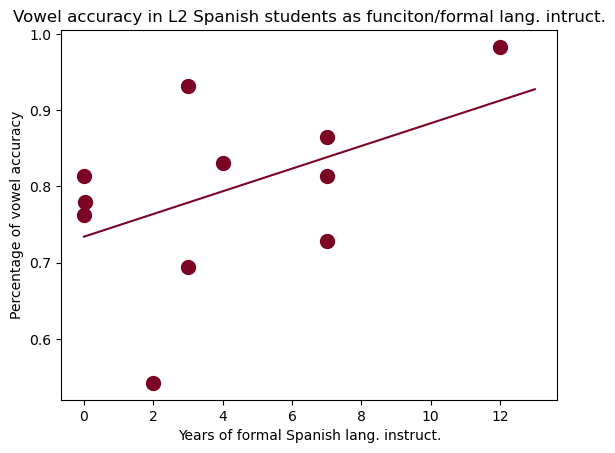

In [21]:
# define the linspace for the plot and the regression
plot_resolution = 1000
mn, mx = np.min(0), np.max(max(years_instruct) + 1)
years_instruct_lin = np.linspace(mn, mx, plot_resolution)

predicted_accuracy = (accuracy_intercept + (years_instruct_lin*accuracy_slope))

plt.plot(years_instruct_lin, predicted_accuracy, c = "xkcd:wine red") # plot the regression--if you could even call it that--of the function
plt.scatter(years_instruct, total_accuracy, s= 100, c = "xkcd:wine red") # plot the individual data points

plt.xlabel('Years of formal Spanish lang. instruct.')
plt.ylabel('Percentage of vowel accuracy')
plt.title('Vowel accuracy in L2 Spanish students as funciton/formal lang. intruct.')

plt.savefig("vowel_accuracy_formal_lang_instruct.png")
plt.show()

In [22]:
pronunciation_proportions

[0.9830508474576272,
 0.8305084745762712,
 0.7796610169491526,
 0.7288135593220338,
 0.8135593220338984,
 0.864406779661017,
 0.7627118644067796,
 0.8135593220338984,
 0.5423728813559322,
 0.9322033898305084,
 0.6949152542372882]

In [23]:
test_file

NameError: name 'test_file' is not defined

In [24]:
test_class = ipa.Participant(test_file, survey_data, prescriptive_transcription)

NameError: name 'test_file' is not defined

In [25]:
test_class.survey_dictionary

NameError: name 'test_class' is not defined

In [26]:
test_class.pronunciation_dictionary

NameError: name 'test_class' is not defined

In [27]:
test_class.pronunciation_dataframe

NameError: name 'test_class' is not defined

In [ ]:
test_class.survey_dictionary

{'partic_number': 'partic07',
 'age': 46,
 'self_identify': 'Intermediate',
 'spanish_travel': 'Yes',
 'travel_abroad': 'No',
 'heritage_exposure': 'No',
 'formal_instruct': 'Yes',
 'years_formal_instruct': 4.0,
 'explicit_pronunciation': 'Yes',
 'spanish_exposure': 'Rarely',
 'spanish_production': 'Rarely',
 'last_spanish': 'This year',
 'learn_spanish': 'No',
 'partic_index': 7}

In [ ]:
test_class.pronunciation_dictionary

{'full_path': 'transcriptions/descriptive/partic07.txt',
 'file_name': 'partic07',
 'prefix': '',
 'extention': '.txt',
 'partic_num': 7,
 'raw_transcript': 'i-sei̯ # kom-bi-na-si̯on # i-ni-si̯o # ɛ-du-ka-si̯on # as-ta # o-ho # ka-si # u-saɾ # funk-si̯o-naɾ # kan-taɾ # a-ju-dʌ # om-bɾei̯ # ɛs-ta # sa-βe # o-poɻ-tu-ni-dad # to-ke # ɛl # su # eɾ-ma-na # ɛs-ta # ta-za # ɪm-poɻ-tan-tei̯ # ke # ɛl # tan-to',
 'clean_transcript': ['i-sei̯',
  'kom-bi-na-si̯on',
  'i-ni-si̯o',
  'ɛ-du-ka-si̯on',
  'as-ta',
  'o-ho',
  'ka-si',
  'u-saɾ',
  'funk-si̯o-naɾ',
  'kan-taɾ',
  'a-ju-dʌ',
  'om-bɾei̯',
  'ɛs-ta',
  'sa-βe',
  'o-poɻ-tu-ni-dad',
  'to-ke',
  'ɛl',
  'su',
  'eɾ-ma-na',
  'ɛs-ta',
  'ta-za',
  'ɪm-poɻ-tan-tei̯',
  'ke',
  'ɛl',
  'tan-to']}

In [ ]:
partic_IDs = [(x + 1) for x in range(15)]

In [ ]:
participant_classes = [ipa.Participant(file, survey_data, prescriptive_transcription) for file in desc_transcript_files]
participant_data = [(i, e.pronunciation_dataframe) for i,e in enumerate(participant_classes)]


In [ ]:
participant_data[1]

(1,
     word_number prescriptive_pronunciation student_pronunciation  \
 0             0                       i-se                i-sei̯   
 1             0                       i-se                i-sei̯   
 2             1            kom-bi-na-si̯on       kom-bi-na-si̯on   
 3             1            kom-bi-na-si̯on       kom-bi-na-si̯on   
 4             1            kom-bi-na-si̯on       kom-bi-na-si̯on   
 5             1            kom-bi-na-si̯on       kom-bi-na-si̯on   
 6             2                  i-ni-si̯o             i-ni-si̯o   
 7             2                  i-ni-si̯o             i-ni-si̯o   
 8             2                  i-ni-si̯o             i-ni-si̯o   
 9             3              e-ðu-ka-si̯on         ɛ-du-ka-si̯on   
 10            3              e-ðu-ka-si̯on         ɛ-du-ka-si̯on   
 11            3              e-ðu-ka-si̯on         ɛ-du-ka-si̯on   
 12            3              e-ðu-ka-si̯on         ɛ-du-ka-si̯on   
 13            4              

In [ ]:
partic_IDs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
survey_data

,partic_number,age,self_identify,spanish_travel,travel_abroad,heritage_exposure,formal_instruct,years_formal_instruct,explicit_pronunciation,spanish_exposure,spanish_production,last_spanish,learn_spanish,partic_index
6,partic01,20,Beginner,Yes,No,No,Yes,2.00,Yes,Almost never,Almost never,It's been a long time,No,1
3,partic02,28,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Sometimes,Almost never,It's been a long time,Yes,2
4,partic03,21,Beginner-Intermediate,Yes,No,No,Yes,3.00,Yes,Rarely,Sometimes,This week,No,3
1,partic04,21,Advanced,No,No,No,Yes,7.00,Yes,NaN,Rarely,This week,No,4
2,partic05,47,Beginner-Intermediate,Yes,No,No,No,0.00,No,Sometimes,Rarely,This week,Yes,5
5,partic06,27,Beginner,Yes,No,No,Yes,0.02,Yes,Sometimes,Almost never,It's been a long time,No,6
7,partic07,46,Intermediate,Yes,No,No,Yes,4.00,Yes,Rarely,Rarely,This year,No,7
8,partic08,19,Advanced,Yes,No,No,Yes,5.00,Yes,Rarely,Sometimes,This month,Yes,8
9,partic09,17,Beginner-Intermediate,No,No,No,Yes,3.00,Yes,Rarely,Rarely,This week,Yes,9
0,partic10,20,Intermediate-Advanced,Yes,No,No,Yes,7.00,Yes,Sometimes,Sometimes,This month,Yes,10


In [ ]:
x.index

AttributeError: 'Participant' object has no attribute 'index'

In [ ]:
y = x.iloc[10].to_dict()
y?

AttributeError: 'Participant' object has no attribute 'iloc'

In [ ]:
help(dict)

In [ ]:
test = grab_number(survey_data["partic_number"][1])

In [ ]:
test

In [ ]:
# using the datetime module, select 10 random days between today and April 10, 2023
import datetime
import random

start_date = datetime.date.today()
end_date = datetime.date(2023, 4, 10)

random_dates = []
for i in range(10):
    random_dates.append(start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days)))
    

In [ ]:
random_dates

In [ ]:
random_dates